In [20]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
import matplotlib.pyplot as plt


def plot_inventory_levels(env, model):
    inventory_levels = []
    rewards = []
    obs, info = env.reset(seed=42)
    done = False
    for _ in range(100):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        inventory_levels.append(obs[0])
        rewards.append(reward)
        done = terminated or truncated
        if done:
            obs, info = env.reset()
    inventory_levels = np.array(inventory_levels)
    plt.figure(figsize=(10, 6))
    plt.step(range(len(inventory_levels)), inventory_levels, where="mid")
    plt.fill_between(
        range(len(inventory_levels)), 0, inventory_levels, step="mid", alpha=0.2
    )
    neg_indices = [i for i, r in enumerate(rewards) if r < 0]
    plt.scatter(
        neg_indices,
        inventory_levels[neg_indices],
        marker="o",
        color="red",
        label="Negative Reward",
    )

    plt.xlabel("Time Step")
    plt.ylabel("Inventory Level")
    plt.show()


class MinimalInventoryEnv(gym.Env):
    def __init__(self):
        super().__init__()
        self.demand_dist = [0, 5]  # uniform demand between 0 and 4
        self.max_steps = 100
        self.max_inventory = 10
        # 1D state: inventory level x_t ∈ [0, 10]
        self.observation_space = spaces.Box(
            low=np.array([0], dtype=np.float32),
            high=np.array([self.max_inventory], dtype=np.float32),
        )
        # Discrete actions: order quantity {0, 1, 2, 3, 4, 5}
        self.action_space = spaces.Discrete(6)
        self.inv = 0.0
        self.step_count = 0

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)
        # Set initial inventory
        self.step_count = 0
        self.inv = self.np_random.integers(0, self.max_inventory + 1)
        obs = np.array([self.inv], dtype=np.float32)
        info = {}
        return obs, info

    def step(self, action):
        self.step_count += 1
        reward = 0.0
        noise = self.np_random.integers(-1, 2)  # -1, 0, or +1
        order_qty = np.clip(int(action) + noise, 0, 5)
        if self.inv + order_qty > self.max_inventory:
            order_qty = self.max_inventory - self.inv
            reward -= 2.0
        self.inv += order_qty
        low, high = self.demand_dist
        demand = self.np_random.integers(low, high)
        if demand > self.inv:
            demand = self.inv  # lost sales
            reward -= 1.0
        else:
            reward += 1.0
        self.inv -= demand
        terminated = self.step_count >= self.max_steps
        truncated = False
        obs = np.array([self.inv], dtype=np.float32)
        info = {}
        return obs, reward, terminated, truncated, info

Output()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 39.2     |
| time/              |          |
|    fps             | 9204     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | 42.7        |
| time/                   |             |
|    fps                  | 6364        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016728079 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | -0.0128     |
|    learning_rate        | 0.0003      |
|    loss                 | 6.74        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0297     |
|    value_loss           | 20.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | 49.7        |
| time/                   |             |
|    fps                  | 5703        |
|    iterations           | 3           |
|    time_elapsed         | 1           |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.012555055 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.74       |
|    explained_variance   | 0.023       |
|    learning_rate        | 0.0003      |
|    loss                 | 11          |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 24.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | 54.2        |
| time/                   |             |
|    fps                  | 5473        |
|    iterations           | 4           |
|    time_elapsed         | 1           |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.012302456 |
|    clip_fraction        | 0.0614      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | -0.0356     |
|    learning_rate        | 0.0003      |
|    loss                 | 15.1        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00726    |
|    value_loss           | 33.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | 56.7        |
| time/                   |             |
|    fps                  | 5294        |
|    iterations           | 5           |
|    time_elapsed         | 1           |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.008818099 |
|    clip_fraction        | 0.0432      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.00241     |
|    learning_rate        | 0.0003      |
|    loss                 | 27.2        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0037     |
|    value_loss           | 45.1        |
-----------------------------------------


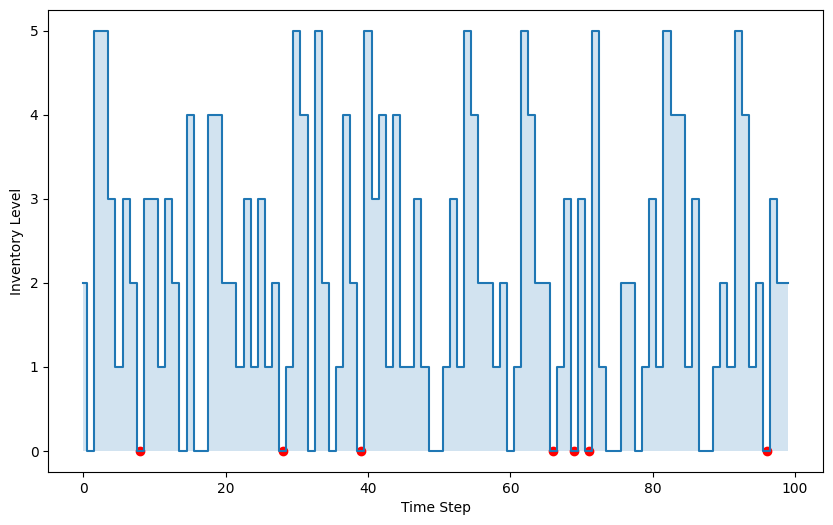

In [21]:
env = MinimalInventoryEnv()
check_env(env, warn=True)  # will print warnings if something is off

model = PPO(
    policy="MlpPolicy",
    env=env,
    verbose=1,
)

model.learn(total_timesteps=10_000, progress_bar=True)
# Save and load your trained model
# model.save("ppo_inventory")
# model = PPO.load("ppo_inventory", env=env)

plot_inventory_levels(env, model)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 83335), started 0:33:48 ago. (Use '!kill 83335' to kill it.)

Obs: [2.], Action: 4, Reward: 1.0
Obs: [4.], Action: 4, Reward: 1.0
Obs: [6.], Action: 1, Reward: 1.0
Obs: [6.], Action: 0, Reward: 1.0
Obs: [4.], Action: 0, Reward: 1.0
Obs: [3.], Action: 1, Reward: 1.0
Obs: [4.], Action: 3, Reward: 1.0
Obs: [4.], Action: 1, Reward: 1.0
Obs: [0.], Action: 1, Reward: 1.0
Obs: [2.], Action: 4, Reward: 1.0
Obs: [6.], Action: 4, Reward: 1.0
Obs: [4.], Action: 0, Reward: 1.0
Obs: [3.], Action: 1, Reward: 1.0
Obs: [5.], Action: 3, Reward: 1.0
Obs: [4.], Action: 1, Reward: 1.0
Obs: [4.], Action: 1, Reward: 1.0
Obs: [1.], Action: 1, Reward: 1.0
Obs: [0.], Action: 4, Reward: 1.0
Obs: [4.], Action: 4, Reward: 1.0
Obs: [5.], Action: 1, Reward: 1.0
Obs: [4.], Action: 1, Reward: 1.0
Obs: [5.], Action: 1, Reward: 1.0
Obs: [5.], Action: 1, Reward: 1.0
Obs: [4.], Action: 1, Reward: 1.0
Obs: [3.], Action: 1, Reward: 1.0
Obs: [4.], Action: 3, Reward: 1.0
Obs: [3.], Action: 1, Reward: 1.0
Obs: [3.], Action: 3, Reward: 1.0
Obs: [2.], Action: 3, Reward: 1.0
Obs: [3.], Act

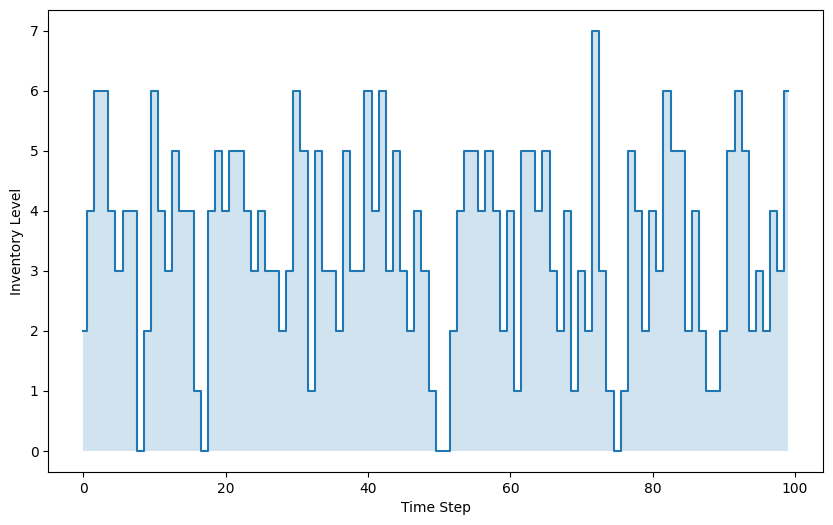

In [ ]:
# policy_kwargs = dict(
#     net_arch=dict(
#         pi=[64, 64],      # policy network
#         vf=[64, 64]       # value function network
#     )
# )
policy_kwargs = dict(net_arch=[64, 64])
vec_env = make_vec_env(MinimalInventoryEnv, n_envs=8)
model = PPO(
    "MlpPolicy",
    vec_env,
    verbose=0,
    clip_range=0.4,
    tensorboard_log="./ppo_tensorboard/",
    seed=42,
    n_epochs=20,
    gamma=0.95,
    policy_kwargs=policy_kwargs,
    learning_rate=1e-4,
)
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir ./ppo_tensorboard/ --port 6006

model.learn(total_timesteps=100_000, progress_bar=False)

# 4) Save the trained model
# model.save("ppo_inventory")

# Optional: reload
# model = PPO.load("ppo_inventory", env=env)
plot_inventory_levels(env, model)